In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch.autograd import Variable

from model import SiameseNet
from data_loader import *
from utils import plot_omniglot_pairs

%load_ext autoreload
%autoreload 2

In [ ]:
data_dir = './data/'

In [ ]:
train_loader, valid_loader = get_train_valid_loader(data_dir, 32, False)
test_loader = get_test_loader(data_dir, 32)

In [13]:
x, y = next(iter(train_loader))

# grab the first 2 pairs
x = x[20:24, :]
y = y[20:24]

x = x.numpy()
x = np.transpose(x, (0, 1, 3, 4, 2))

y = y.numpy()

print("x: {}".format(x.shape))
print("y: {}".format(y.shape))

x: (4, 2, 105, 105, 1)
y: (4, 1)


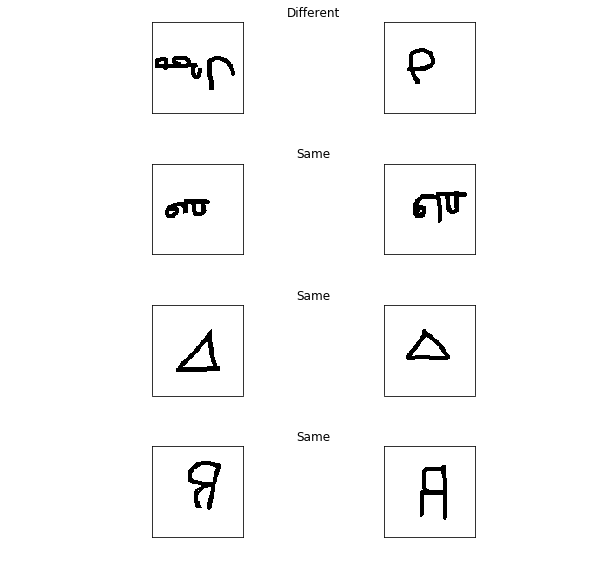

In [14]:
plot_omniglot_pairs(x, y)